In [114]:
#import libraries for analysis:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')
plt.rcParams['axes.prop_cycle'] = plt.cycler(color = sns.color_palette('dark'))
plt.rcParams['figure.figsize'] = (20 , 20)

In [115]:
# download dataset
!curl -L -o ./data/ipl.csv "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/158/850/original/IPL_2008-2024.csv?1760202529"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  218k  100  218k    0     0   645k      0 --:--:-- --:--:-- --:--:--  646k


# 📝 Question 1: Data Preprocessing & Feature Engineering (15 points)

### Task:

1. Load the IPL dataset and perform comprehensive EDA
2. Handle missing values appropriately with justification
3. Create these new features:
   - `home_advantage`: Boolean indicating if team1 is playing in their home city
   - `match_importance`: Categorical (league/playoff/final) based on date and season
   - `toss_advantage`: Whether toss winner won the match
   - `season_phase`: Early/Mid/Late season

### Deliverables:

- Clean dataset with no missing values
- Visualization showing distribution of matches across venues
- Statistical summary of win percentages for toss winners


In [116]:
# load dataset
df = pd.read_csv('./data/ipl.csv')
df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2008,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2008,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2008,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2008,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2008,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   int64  
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

## EDA on indivisual columns:


## 1. city


Percentage of missing data: 4.66


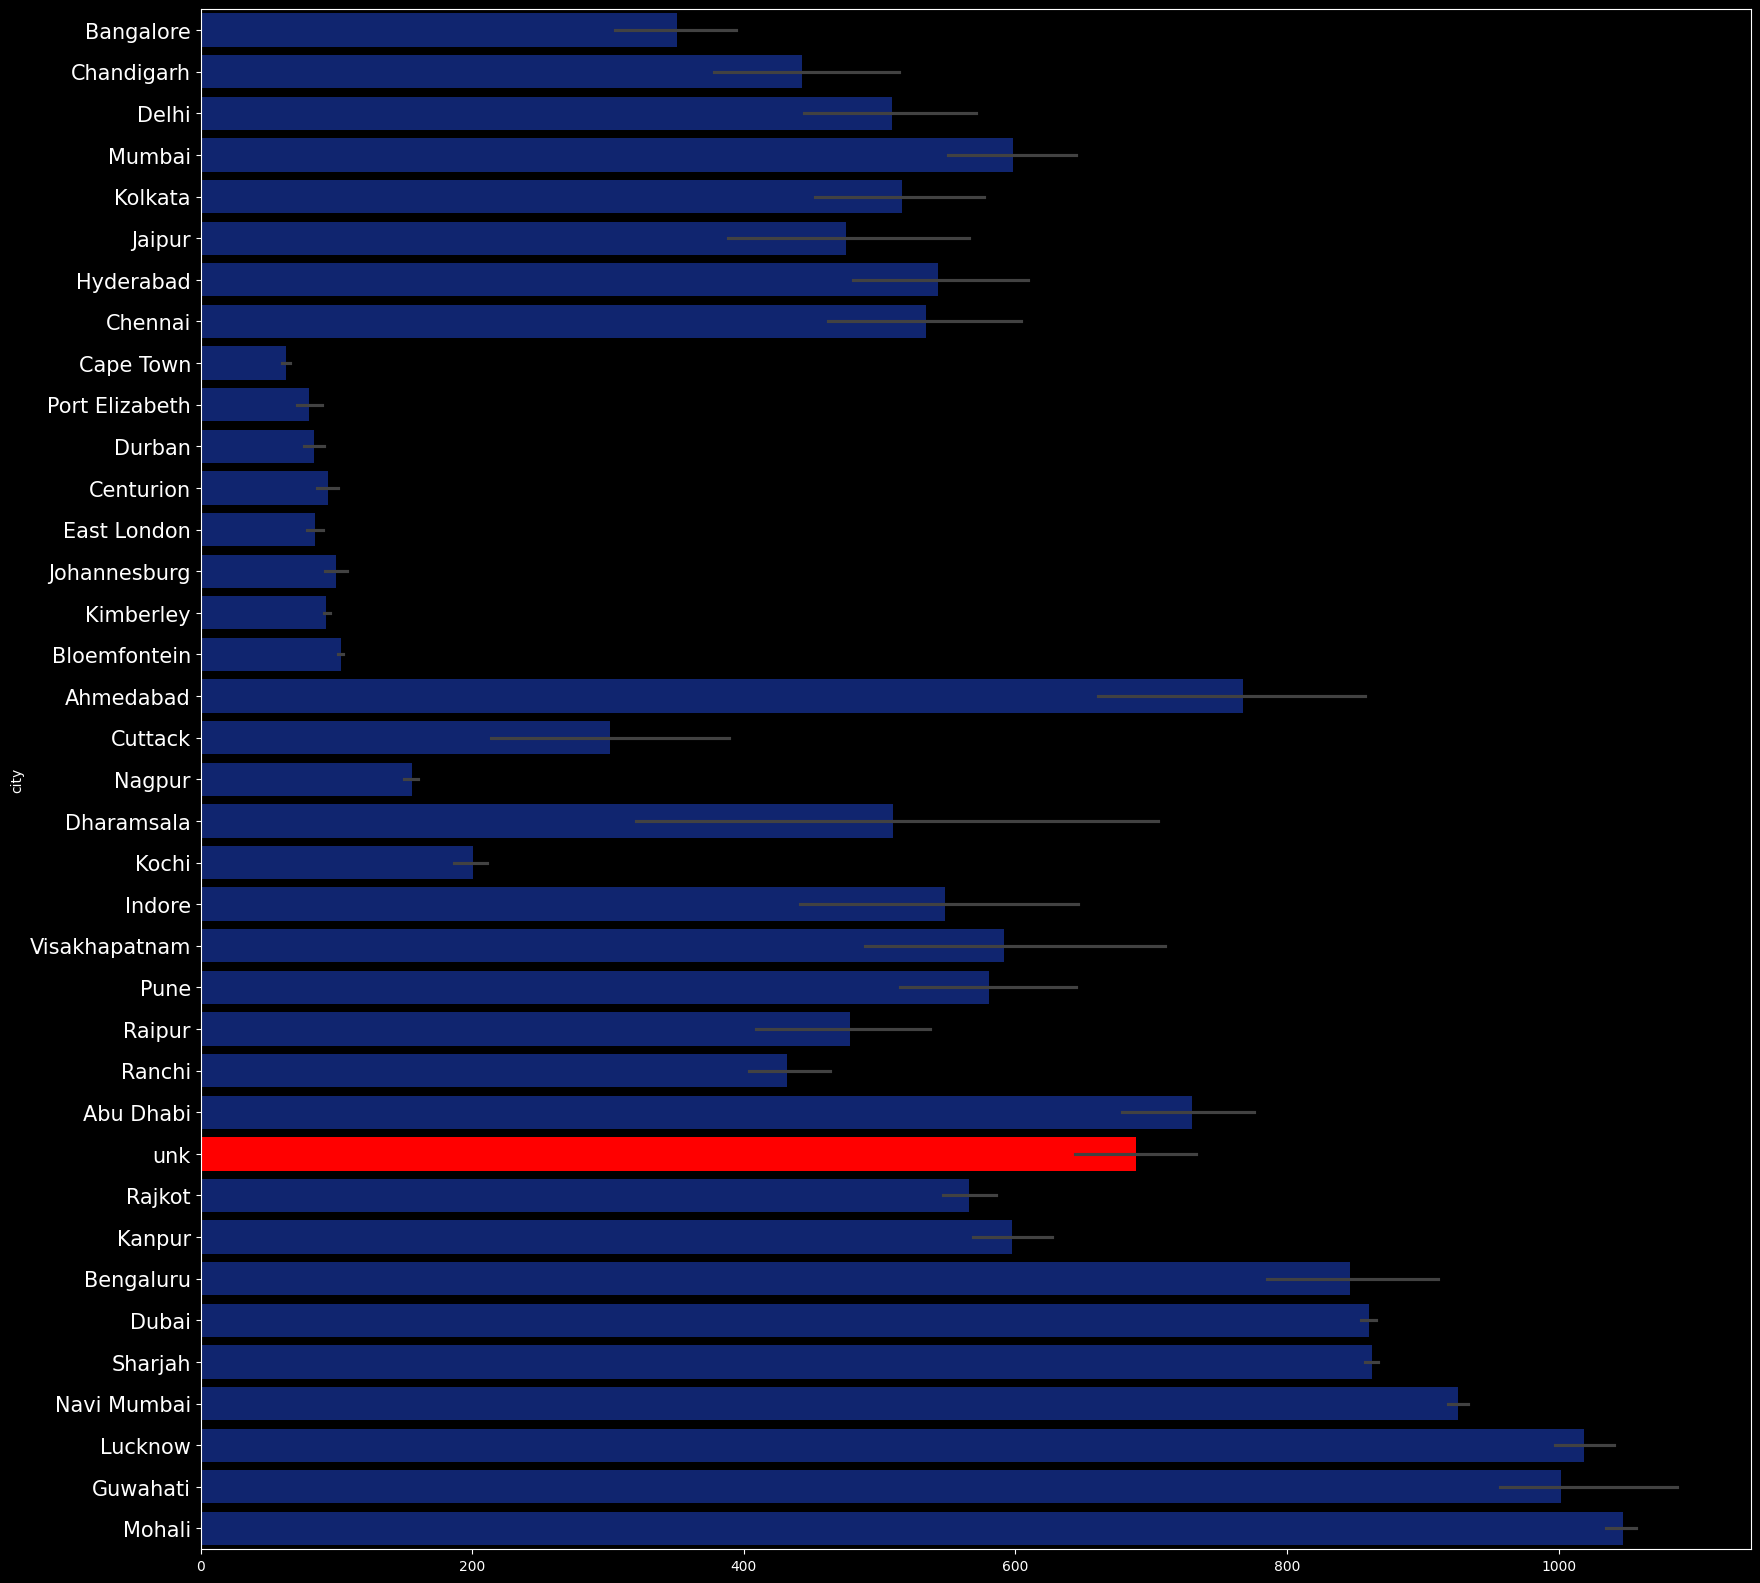

In [118]:
# skip features such as id and session since they are not-null
# columns to check = ['city' , 'player_of_match' , 'winner' , 'result_margin' , 'target_runs/overs' , 'method']

# 1. city:
city = df['city']

pmissing = (np.sum(city.isnull()) / city.size) * 100
print(f"Percentage of missing data: {np.round(pmissing , 2)}")

city = city.fillna('unk')
ax = sns.barplot(city)
bars = ax.patches
yticks = [t.get_text() for t in ax.get_yticklabels()]
yind = yticks.index('unk')
bars[yind].set_facecolor('red')

plt.yticks(fontsize = 15)
plt.show()

df['city'] = city

# stratergy -> replace missing data with unk token, to represent the set of cities that hosted a match but were never mentioned.



### 2. player of match:


In [119]:
pom = df['player_of_match']
df[pom.isnull()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
241,501265,2011,Delhi,2011-05-21,League,NaN,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,no result,NaN,NaN,NaN,N,NaN,SS Hazare,RJ Tucker
485,829763,2015,Bangalore,2015-04-29,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,NaN,NaN,NaN,N,NaN,JD Cloete,PG Pathak
511,829813,2015,Bangalore,2015-05-17,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NaN,no result,NaN,188.0,20.0,N,NaN,HDPK Dharmasena,K Srinivasan
744,1178424,2019,Bengaluru,2019-04-30,League,NaN,M.Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,NaN,63.0,5.0,N,NaN,NJ Llong,UV Gandhe
994,1359519,2023,Lucknow,2023-05-03,League,NaN,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,field,NaN,no result,NaN,NaN,NaN,N,NaN,AK Chaudhary,NA Patwardhan


- since there are just 5 matches where no result was declared so both player_of_matcha and winner features are missing, we again replace the null value with unk token for sanity purposes(I love nlp!).


In [120]:
df['player_of_match'] = df['player_of_match'].fillna('unk')
df['winner'] = df['winner'].fillna('unk')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   int64  
 2   city             1095 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1095 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1095 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

### 3. result_margin


In [121]:
df[df['result_margin'].isnull()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
66,392190,2009,Cape Town,2009-04-23,League,YK Pathan,Newlands,Kolkata Knight Riders,Rajasthan Royals,Kolkata Knight Riders,field,Rajasthan Royals,tie,NaN,151.0,20.0,Y,NaN,MR Benson,M Erasmus
130,419121,2010,Chennai,2010-03-21,League,J Theron,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,field,Kings XI Punjab,tie,NaN,137.0,20.0,Y,NaN,K Hariharan,DJ Harper
241,501265,2011,Delhi,2011-05-21,League,unk,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,unk,no result,NaN,NaN,NaN,N,NaN,SS Hazare,RJ Tucker
328,598004,2013,Hyderabad,2013-04-07,League,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Sunrisers Hyderabad,tie,NaN,131.0,20.0,Y,NaN,AK Chaudhary,S Ravi
342,598017,2013,Bangalore,2013-04-16,League,V Kohli,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,Royal Challengers Bangalore,tie,NaN,153.0,20.0,Y,NaN,M Erasmus,VA Kulkarni
416,729315,2014,Abu Dhabi,2014-04-29,League,JP Faulkner,Sheikh Zayed Stadium,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,bat,Rajasthan Royals,tie,NaN,153.0,20.0,Y,NaN,Aleem Dar,AK Chaudhary
475,829741,2015,Ahmedabad,2015-04-21,League,SE Marsh,"Sardar Patel Stadium, Motera",Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,tie,NaN,192.0,20.0,Y,NaN,M Erasmus,S Ravi
485,829763,2015,Bangalore,2015-04-29,League,unk,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,unk,no result,NaN,NaN,NaN,N,NaN,JD Cloete,PG Pathak
511,829813,2015,Bangalore,2015-05-17,League,unk,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,unk,no result,NaN,188.0,20.0,N,NaN,HDPK Dharmasena,K Srinivasan
610,1082625,2017,Rajkot,2017-04-29,League,KH Pandya,Saurashtra Cricket Association Stadium,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,Mumbai Indians,tie,NaN,154.0,20.0,Y,NaN,AK Chaudhary,CB Gaffaney


### for missing result_margin, its either a tie or no-result in match/ match abandoned. we replace NaN values with 0, since 0 margin = no-result/tie


In [122]:
df['result_margin'] = df['result_margin'].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   int64  
 2   city             1095 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1095 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1095 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1095 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

### 4. target_runs/overs:


In [123]:
truns = df['target_runs']
tovers = df['target_overs']
df[tovers.isnull()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
241,501265,2011,Delhi,2011-05-21,League,unk,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,unk,no result,0.0,NaN,NaN,N,NaN,SS Hazare,RJ Tucker
485,829763,2015,Bangalore,2015-04-29,League,unk,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,unk,no result,0.0,NaN,NaN,N,NaN,JD Cloete,PG Pathak
994,1359519,2023,Lucknow,2023-05-03,League,unk,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,field,unk,no result,0.0,NaN,NaN,N,NaN,AK Chaudhary,NA Patwardhan


- https://www.espncricinfo.com/series/indian-premier-league-2011-466304/delhi-daredevils-vs-pune-warriors-68th-match-501265/full-scorecard
- I researched the first match and found out the game was abandoned due to extreme rain.
- This jibes with our previous pre-processing that says no-result for result feature.


### we replace missing target_overs/runs values with zero, via the analogy no item = 0 item.


In [124]:
df['target_runs'] = truns.fillna(0)
df['target_overs'] = tovers.fillna(0)

### 5. method feature:

- if a match finished under normal conditions then no external method to determine the winner of the match was used -> match finished under normal conditions - 1074/1095 matches.


In [125]:
method = df['method']
print(f"% of matches finished normally: { np.sum(method.isnull()) / df.shape[0]}")
df['method'] = method.fillna('normal')

% of matches finished normally: 0.9808219178082191


Q. Create these new features:

- `home_advantage`: Boolean indicating if team1 is playing in their home city
- `match_importance`: Categorical (league/playoff/final) based on date and season
- `toss_advantage`: Whether toss winner won the match
- `season_phase`: Early/Mid/Late season


1095